# Problem Statement:
Travelling through flights has become an integral part of today’s lifestyle as more and 
more people are opting for faster travelling options. The flight ticket prices increase or 
decrease every now and then depending on various factors like timing of the flights, 
destination, and duration of flights various occasions such as vacations or festive 
season. Therefore, having some basic idea of the flight fares before planning the trip will 
surely help many people save money and time.
The main goal is to predict the fares of the flights based on different factors available in 
the provided dataset.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
train_data=pd.read_excel('flight dataset/Data_Train.xlsx')

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
#checking null values
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [8]:
train_data.dropna(inplace=True)

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Exploratory Data Analysis

From description we can see that Date_of_Journey is a object data type,
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas to_datetime to convert object data type to datetime dtype.

In [10]:
train_data["Journey_day"]=pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.day

In [11]:
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [12]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [13]:
 #Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
train_data.drop(["Date_of_Journey"],axis=1,inplace=True)  

In [14]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [15]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [16]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [17]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [18]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list

duration=list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split())!=2: #check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [19]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [20]:
train_data.drop(["Duration"], axis = 1, inplace = True)


In [21]:
train_data.head()


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


### Handling Categorical Data

In [22]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

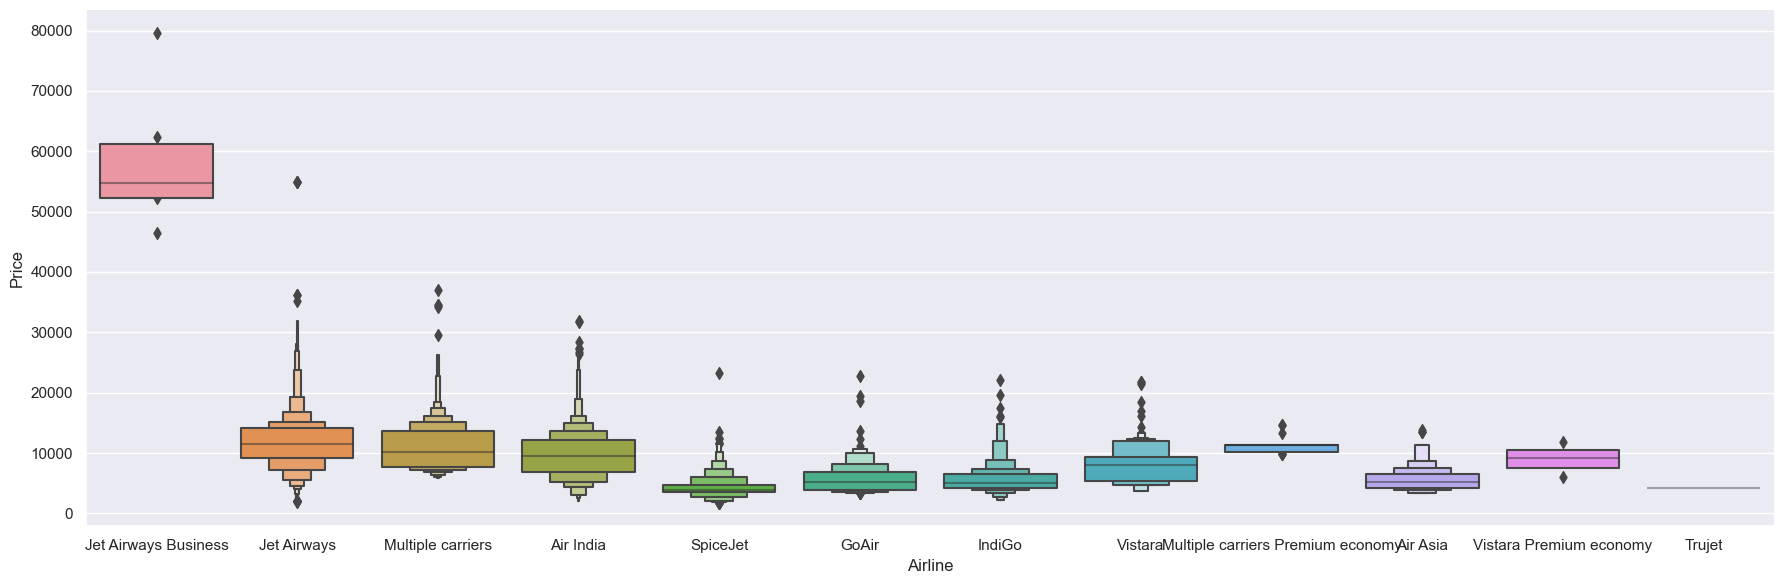

In [23]:
# Airline vs Price
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

- From graph we can see that Jet Airways Business have the highest Price.
- Apart from the first Airline almost all are having similar median

In [24]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = train_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [25]:
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

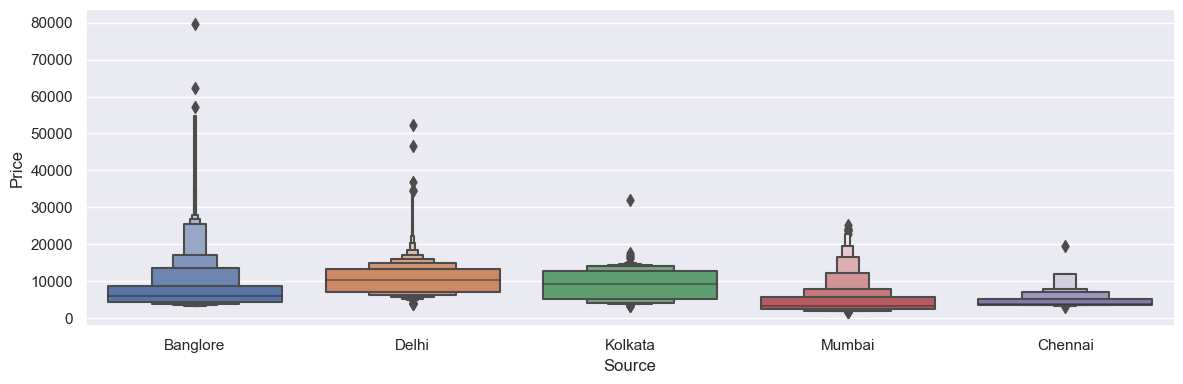

In [26]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [27]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()



,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [28]:
train_data["Destination"].value_counts()


Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [29]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [30]:
train_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [31]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [32]:
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [33]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [34]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [35]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [36]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [37]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [38]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [39]:
data_train.shape

(10682, 30)

### Test set

In [40]:
test_data = pd.read_excel("Flight dataset\Test_set.xlsx")

In [41]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [42]:


# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)



Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [43]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0



### Feature Selection

In [44]:
data_train.shape

(10682, 30)

In [45]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [46]:
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()



,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [47]:
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

C:\Users\91807\AppData\Local\Temp\ipykernel_38112\3228867913.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")


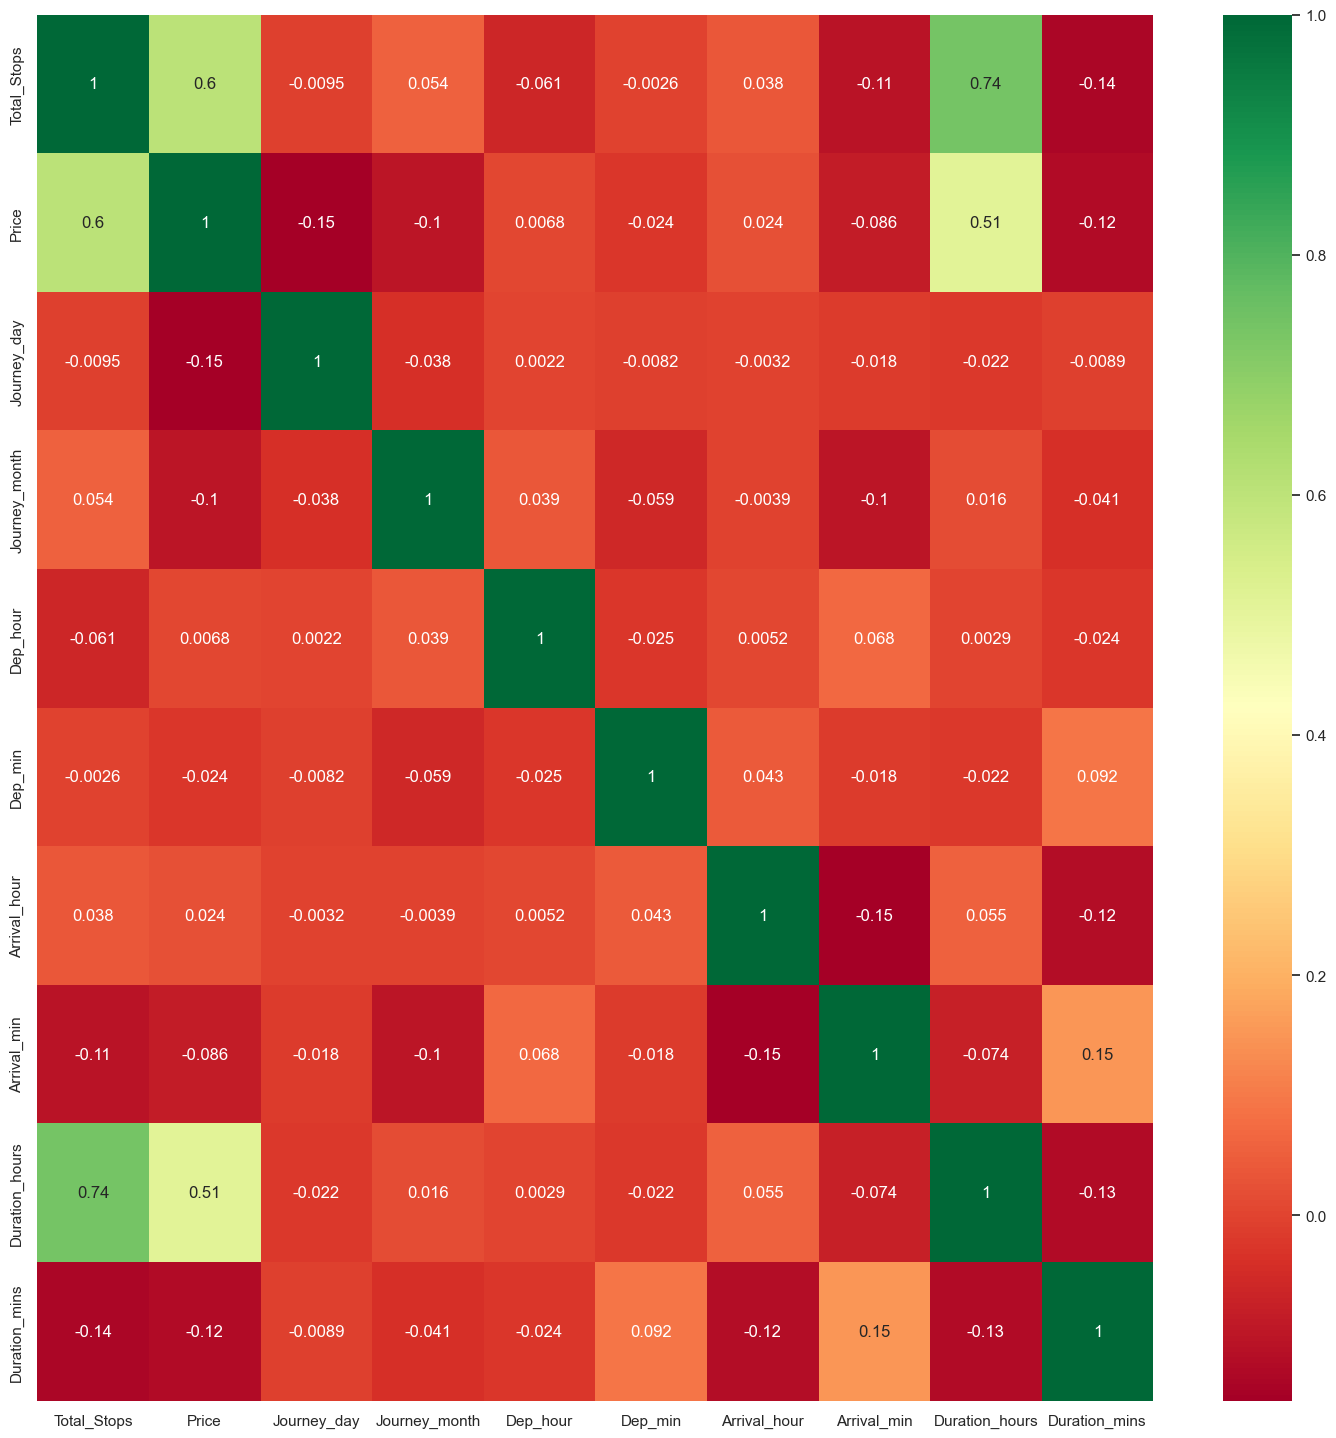

In [48]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [49]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [50]:
print(selection.feature_importances_)

[2.42935179e-01 1.43989625e-01 5.28630031e-02 2.39898965e-02
 2.10644879e-02 2.79070147e-02 1.96591017e-02 1.00044463e-01
 1.78530264e-02 9.74910029e-03 1.93994105e-03 1.73711158e-02
 1.46213526e-01 6.70626950e-02 1.75605733e-02 9.05595420e-04
 3.54566865e-03 1.19477354e-04 5.06823259e-03 9.11849697e-05
 4.41454384e-04 1.10062843e-02 3.47917804e-03 6.96398019e-03
 1.03027680e-02 1.57130826e-02 6.82082666e-03 5.18109611e-04
 2.48214087e-02]


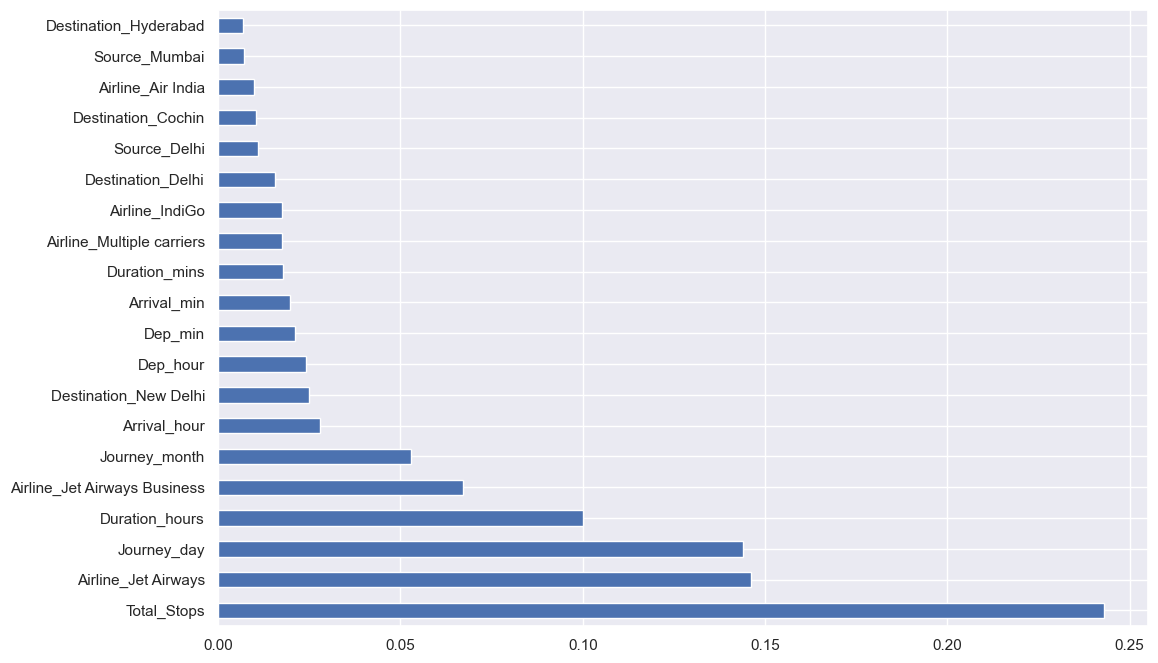

In [51]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

### Training Algorithm with various models

In [52]:
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [54]:
X_train.shape, X_test.shape

((8545, 29), (2137, 29))

#### Create an Evaluate Function to give all metrics after model Training

In [55]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

#### Training Various models

In [56]:


models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')



Linear Regression
Model performance for Training set
- Root Mean Squared Error: 2822.3205
- Mean Absolute Error: 1946.2117
- R2 Score: 0.6241
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2863.9706
- Mean Absolute Error: 1972.9373
- R2 Score: 0.6196


Lasso
Model performance for Training set
- Root Mean Squared Error: 2823.3365
- Mean Absolute Error: 1946.5817
- R2 Score: 0.6238
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2866.0313
- Mean Absolute Error: 1974.1053
- R2 Score: 0.6190


Ridge
Model performance for Training set
- Root Mean Squared Error: 2829.1982
- Mean Absolute Error: 1948.2536
- R2 Score: 0.6222
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2867.9529
- Mean Absolute Error: 1977.2527
- R2 Score: 0.6185


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 2367.9560
- Mean Absolute Error: 1444.7256


In [57]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.865172
6,XGBRegressor,0.846332
5,Random Forest Regressor,0.798699
4,Decision Tree,0.729872
0,Linear Regression,0.619594
1,Lasso,0.619047
2,Ridge,0.618536
3,K-Neighbors Regressor,0.574371
8,AdaBoost Regressor,0.536764


In [58]:
#build model
cbr = CatBoostRegressor(loss_function='RMSE')
# Fit model 
cbr.fit( X_train, y_train,
               eval_set=(X_test, y_test),
               plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.071314
0:	learn: 4439.4499675	test: 4479.4530892	best: 4479.4530892 (0)	total: 3.33ms	remaining: 3.33s
1:	learn: 4285.6306028	test: 4326.8063180	best: 4326.8063180 (1)	total: 7.14ms	remaining: 3.56s
2:	learn: 4109.5505771	test: 4152.6835357	best: 4152.6835357 (2)	total: 10.9ms	remaining: 3.63s
3:	learn: 3985.1635799	test: 4029.0937083	best: 4029.0937083 (3)	total: 15.7ms	remaining: 3.9s
4:	learn: 3843.9627299	test: 3885.6173093	best: 3885.6173093 (4)	total: 19.7ms	remaining: 3.91s
5:	learn: 3717.1686322	test: 3747.9476305	best: 3747.9476305 (5)	total: 23.8ms	remaining: 3.94s
6:	learn: 3592.1786634	test: 3615.2538982	best: 3615.2538982 (6)	total: 28.9ms	remaining: 4.11s
7:	learn: 3486.3488868	test: 3520.9436846	best: 3520.9436846 (7)	total: 33.4ms	remaining: 4.15s
8:	learn: 3404.4662252	test: 3448.3226444	best: 3448.3226444 (8)	total: 37.2ms	remaining: 4.09s
9:	learn: 3304.7065294	test: 3335.7652504	best: 3335.7652504 (9)	total: 41.1ms	remaining: 4.07s
10:	learn: 

87:	learn: 2106.5174021	test: 2112.2772160	best: 2112.2772160 (87)	total: 378ms	remaining: 3.92s
88:	learn: 2103.5474720	test: 2109.3239779	best: 2109.3239779 (88)	total: 382ms	remaining: 3.91s
89:	learn: 2100.6764380	test: 2106.9810612	best: 2106.9810612 (89)	total: 385ms	remaining: 3.9s
90:	learn: 2096.5028279	test: 2103.8488743	best: 2103.8488743 (90)	total: 389ms	remaining: 3.88s
91:	learn: 2090.5597161	test: 2101.4238127	best: 2101.4238127 (91)	total: 397ms	remaining: 3.91s
92:	learn: 2085.5021796	test: 2096.5459797	best: 2096.5459797 (92)	total: 402ms	remaining: 3.92s
93:	learn: 2080.0662096	test: 2092.1715945	best: 2092.1715945 (93)	total: 406ms	remaining: 3.92s
94:	learn: 2075.8056827	test: 2086.1508944	best: 2086.1508944 (94)	total: 413ms	remaining: 3.93s
95:	learn: 2070.7358847	test: 2083.4160901	best: 2083.4160901 (95)	total: 417ms	remaining: 3.93s
96:	learn: 2068.9238265	test: 2080.6659599	best: 2080.6659599 (96)	total: 421ms	remaining: 3.92s
97:	learn: 2065.6192961	test: 2

189:	learn: 1862.3161940	test: 1931.0511111	best: 1931.0511111 (189)	total: 778ms	remaining: 3.31s
190:	learn: 1860.1738776	test: 1929.5889985	best: 1929.5889985 (190)	total: 787ms	remaining: 3.33s
191:	learn: 1857.3681880	test: 1927.7623686	best: 1927.7623686 (191)	total: 791ms	remaining: 3.33s
192:	learn: 1855.2885872	test: 1927.0548927	best: 1927.0548927 (192)	total: 794ms	remaining: 3.32s
193:	learn: 1855.2043090	test: 1927.0013520	best: 1927.0013520 (193)	total: 797ms	remaining: 3.31s
194:	learn: 1855.0365572	test: 1926.9254501	best: 1926.9254501 (194)	total: 799ms	remaining: 3.3s
195:	learn: 1851.9133255	test: 1924.3711351	best: 1924.3711351 (195)	total: 803ms	remaining: 3.29s
196:	learn: 1850.4719989	test: 1923.5412700	best: 1923.5412700 (196)	total: 808ms	remaining: 3.29s
197:	learn: 1849.1969786	test: 1923.2553499	best: 1923.2553499 (197)	total: 811ms	remaining: 3.29s
198:	learn: 1848.5273412	test: 1922.8120741	best: 1922.8120741 (198)	total: 815ms	remaining: 3.28s
199:	learn:

282:	learn: 1727.0170496	test: 1850.7411905	best: 1850.7411905 (282)	total: 1.16s	remaining: 2.95s
283:	learn: 1726.9418110	test: 1850.7657844	best: 1850.7411905 (282)	total: 1.17s	remaining: 2.94s
284:	learn: 1724.8732721	test: 1848.8798370	best: 1848.8798370 (284)	total: 1.17s	remaining: 2.94s
285:	learn: 1723.2066106	test: 1847.7369326	best: 1847.7369326 (285)	total: 1.18s	remaining: 2.94s
286:	learn: 1721.7081289	test: 1846.9202134	best: 1846.9202134 (286)	total: 1.18s	remaining: 2.93s
287:	learn: 1719.0963063	test: 1844.7117649	best: 1844.7117649 (287)	total: 1.18s	remaining: 2.92s
288:	learn: 1717.4491683	test: 1843.4003848	best: 1843.4003848 (288)	total: 1.19s	remaining: 2.92s
289:	learn: 1715.8017824	test: 1842.2057757	best: 1842.2057757 (289)	total: 1.19s	remaining: 2.91s
290:	learn: 1715.6825312	test: 1842.2965558	best: 1842.2057757 (289)	total: 1.19s	remaining: 2.9s
291:	learn: 1714.2928518	test: 1841.7716772	best: 1841.7716772 (291)	total: 1.2s	remaining: 2.9s
292:	learn: 1

385:	learn: 1599.5084522	test: 1794.1410352	best: 1794.1410352 (385)	total: 1.56s	remaining: 2.49s
386:	learn: 1599.4994303	test: 1794.1690921	best: 1794.1410352 (385)	total: 1.57s	remaining: 2.48s
387:	learn: 1598.6359031	test: 1793.6968054	best: 1793.6968054 (387)	total: 1.57s	remaining: 2.48s
388:	learn: 1597.9051207	test: 1793.7109160	best: 1793.6968054 (387)	total: 1.57s	remaining: 2.48s
389:	learn: 1596.8852272	test: 1792.8122738	best: 1792.8122738 (389)	total: 1.58s	remaining: 2.47s
390:	learn: 1594.9160543	test: 1791.2976421	best: 1791.2976421 (390)	total: 1.58s	remaining: 2.47s
391:	learn: 1594.0907507	test: 1790.4924562	best: 1790.4924562 (391)	total: 1.59s	remaining: 2.46s
392:	learn: 1593.0579005	test: 1790.4224059	best: 1790.4224059 (392)	total: 1.59s	remaining: 2.46s
393:	learn: 1592.1048914	test: 1790.1139554	best: 1790.1139554 (393)	total: 1.59s	remaining: 2.45s
394:	learn: 1591.5490648	test: 1790.0877951	best: 1790.0877951 (394)	total: 1.6s	remaining: 2.45s
395:	learn:

484:	learn: 1527.3000778	test: 1763.3324777	best: 1763.3324777 (484)	total: 1.97s	remaining: 2.09s
485:	learn: 1526.5541614	test: 1763.4029915	best: 1763.3324777 (484)	total: 1.97s	remaining: 2.09s
486:	learn: 1525.9430022	test: 1762.8946016	best: 1762.8946016 (486)	total: 1.98s	remaining: 2.08s
487:	learn: 1524.9522781	test: 1762.1038250	best: 1762.1038250 (487)	total: 1.98s	remaining: 2.08s
488:	learn: 1524.6149807	test: 1761.8390739	best: 1761.8390739 (488)	total: 1.98s	remaining: 2.07s
489:	learn: 1524.5623515	test: 1761.7479145	best: 1761.7479145 (489)	total: 1.99s	remaining: 2.07s
490:	learn: 1524.5441012	test: 1761.7554046	best: 1761.7479145 (489)	total: 1.99s	remaining: 2.06s
491:	learn: 1523.5366328	test: 1761.2454900	best: 1761.2454900 (491)	total: 1.99s	remaining: 2.06s
492:	learn: 1523.0326325	test: 1761.2979692	best: 1761.2454900 (491)	total: 2s	remaining: 2.05s
493:	learn: 1523.0264135	test: 1761.2976994	best: 1761.2454900 (491)	total: 2s	remaining: 2.05s
494:	learn: 1522

589:	learn: 1467.0742046	test: 1732.6885820	best: 1732.6885820 (589)	total: 2.37s	remaining: 1.65s
590:	learn: 1466.7692650	test: 1732.4582335	best: 1732.4582335 (590)	total: 2.37s	remaining: 1.64s
591:	learn: 1466.4634463	test: 1732.3080524	best: 1732.3080524 (591)	total: 2.38s	remaining: 1.64s
592:	learn: 1465.8760402	test: 1732.1800460	best: 1732.1800460 (592)	total: 2.38s	remaining: 1.63s
593:	learn: 1465.2659361	test: 1732.3740150	best: 1732.1800460 (592)	total: 2.38s	remaining: 1.63s
594:	learn: 1464.7248628	test: 1731.7572997	best: 1731.7572997 (594)	total: 2.39s	remaining: 1.63s
595:	learn: 1463.9925417	test: 1731.5289243	best: 1731.5289243 (595)	total: 2.39s	remaining: 1.62s
596:	learn: 1463.2192234	test: 1731.1857411	best: 1731.1857411 (596)	total: 2.4s	remaining: 1.62s
597:	learn: 1462.8626313	test: 1731.2314745	best: 1731.1857411 (596)	total: 2.4s	remaining: 1.61s
598:	learn: 1462.4490656	test: 1731.1955188	best: 1731.1857411 (596)	total: 2.4s	remaining: 1.61s
599:	learn: 1

696:	learn: 1411.2871054	test: 1713.9679299	best: 1713.9679299 (696)	total: 2.77s	remaining: 1.21s
697:	learn: 1410.7397837	test: 1713.3760327	best: 1713.3760327 (697)	total: 2.78s	remaining: 1.2s
698:	learn: 1410.5706876	test: 1713.5000680	best: 1713.3760327 (697)	total: 2.78s	remaining: 1.2s
699:	learn: 1409.8429255	test: 1713.4983026	best: 1713.3760327 (697)	total: 2.78s	remaining: 1.19s
700:	learn: 1409.7185613	test: 1713.5439080	best: 1713.3760327 (697)	total: 2.79s	remaining: 1.19s
701:	learn: 1409.2470312	test: 1713.3642436	best: 1713.3642436 (701)	total: 2.79s	remaining: 1.19s
702:	learn: 1408.5576955	test: 1713.3643966	best: 1713.3642436 (701)	total: 2.79s	remaining: 1.18s
703:	learn: 1408.1707136	test: 1713.3267711	best: 1713.3267711 (703)	total: 2.8s	remaining: 1.18s
704:	learn: 1407.8274374	test: 1713.1822084	best: 1713.1822084 (704)	total: 2.8s	remaining: 1.17s
705:	learn: 1407.7434730	test: 1713.0404876	best: 1713.0404876 (705)	total: 2.81s	remaining: 1.17s
706:	learn: 14

789:	learn: 1374.0311782	test: 1704.7424033	best: 1704.7028185 (787)	total: 3.17s	remaining: 843ms
790:	learn: 1373.5095835	test: 1704.6194539	best: 1704.6194539 (790)	total: 3.17s	remaining: 839ms
791:	learn: 1373.1647940	test: 1704.5148835	best: 1704.5148835 (791)	total: 3.18s	remaining: 835ms
792:	learn: 1372.8410296	test: 1704.2711156	best: 1704.2711156 (792)	total: 3.18s	remaining: 831ms
793:	learn: 1372.4158402	test: 1703.9976710	best: 1703.9976710 (793)	total: 3.19s	remaining: 827ms
794:	learn: 1372.3747390	test: 1703.9398288	best: 1703.9398288 (794)	total: 3.19s	remaining: 823ms
795:	learn: 1371.6397909	test: 1703.6383478	best: 1703.6383478 (795)	total: 3.19s	remaining: 819ms
796:	learn: 1371.4972509	test: 1703.6744812	best: 1703.6383478 (795)	total: 3.2s	remaining: 815ms
797:	learn: 1371.4354312	test: 1703.5340975	best: 1703.5340975 (797)	total: 3.2s	remaining: 811ms
798:	learn: 1371.2278364	test: 1703.4751602	best: 1703.4751602 (798)	total: 3.21s	remaining: 807ms
799:	learn: 

888:	learn: 1338.6174316	test: 1692.8897565	best: 1692.8897565 (888)	total: 3.58s	remaining: 447ms
889:	learn: 1338.3503871	test: 1692.6688552	best: 1692.6688552 (889)	total: 3.59s	remaining: 443ms
890:	learn: 1338.0907086	test: 1692.6093235	best: 1692.6093235 (890)	total: 3.59s	remaining: 439ms
891:	learn: 1337.4905040	test: 1692.1897171	best: 1692.1897171 (891)	total: 3.59s	remaining: 435ms
892:	learn: 1337.3192629	test: 1692.0115854	best: 1692.0115854 (892)	total: 3.6s	remaining: 431ms
893:	learn: 1337.2322889	test: 1691.9674127	best: 1691.9674127 (893)	total: 3.6s	remaining: 427ms
894:	learn: 1337.0285389	test: 1691.7192662	best: 1691.7192662 (894)	total: 3.6s	remaining: 423ms
895:	learn: 1336.7601395	test: 1691.8265712	best: 1691.7192662 (894)	total: 3.61s	remaining: 419ms
896:	learn: 1336.3547032	test: 1691.8314585	best: 1691.7192662 (894)	total: 3.61s	remaining: 415ms
897:	learn: 1336.1742009	test: 1692.1005524	best: 1691.7192662 (894)	total: 3.62s	remaining: 411ms
898:	learn: 1

978:	learn: 1310.7608506	test: 1686.9880679	best: 1686.9433550 (977)	total: 3.97s	remaining: 85.2ms
979:	learn: 1310.4969060	test: 1686.9849789	best: 1686.9433550 (977)	total: 3.98s	remaining: 81.1ms
980:	learn: 1310.1105711	test: 1686.8605084	best: 1686.8605084 (980)	total: 3.98s	remaining: 77.1ms
981:	learn: 1309.7774559	test: 1686.6319409	best: 1686.6319409 (981)	total: 3.98s	remaining: 73ms
982:	learn: 1309.3280421	test: 1686.5095778	best: 1686.5095778 (982)	total: 3.98s	remaining: 68.9ms
983:	learn: 1309.0398442	test: 1686.6175656	best: 1686.5095778 (982)	total: 3.99s	remaining: 64.9ms
984:	learn: 1308.3915230	test: 1686.5872048	best: 1686.5095778 (982)	total: 3.99s	remaining: 60.8ms
985:	learn: 1308.2219469	test: 1686.5172080	best: 1686.5095778 (982)	total: 4s	remaining: 56.8ms
986:	learn: 1307.6639651	test: 1686.2195957	best: 1686.2195957 (986)	total: 4s	remaining: 52.7ms
987:	learn: 1307.3799688	test: 1686.0482029	best: 1686.0482029 (987)	total: 4s	remaining: 48.6ms
988:	learn:

In [60]:
y_pred= cbr.predict(X_test)

In [61]:
cbr.score(X_train, y_train)

0.9197614458530329

In [62]:
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 86.84


### Plot y_pred and y_test

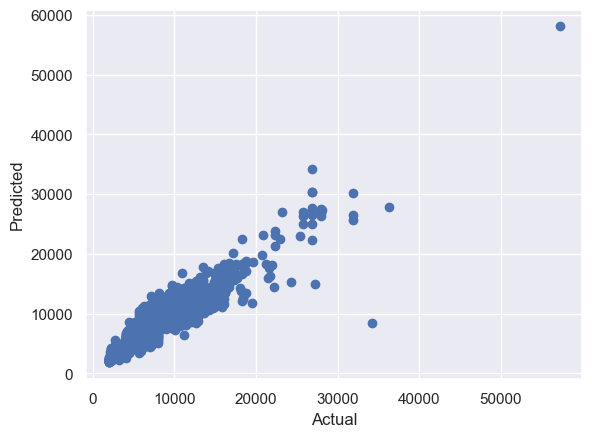

In [63]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');



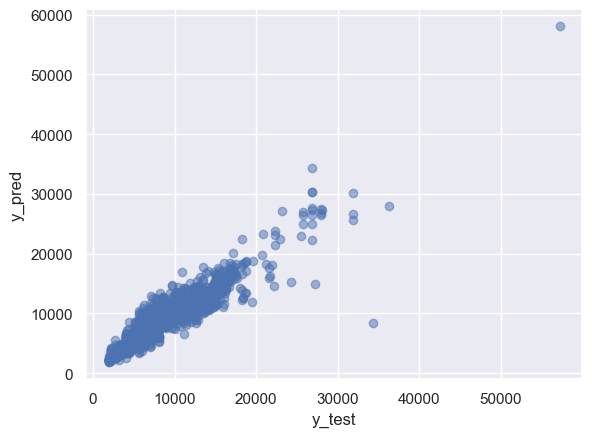

In [64]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### Hyperparameter Tuning

##### Tuning Catboost

In [65]:


# Initializing catboost
cbr1 = CatBoostRegressor(verbose=False)

# Creating the hyperparameter grid
param_dist = {'depth'          : [5,7,9, 10],
              'learning_rate' : [0.01,0.03,0.5,0.1],
               'iterations'    : [500,600,700,999]}

#Instantiate RandomSearchCV object
rscv = RandomizedSearchCV(cbr , param_dist, scoring='r2', cv =5, n_jobs=-1)

# Fit the model
rscv.fit(X_train, y_train)

# Print the tuned parameters and score
print(rscv.best_params_)
print(rscv.best_score_)



0:	learn: 4375.0315306	total: 4.69ms	remaining: 3.28s
1:	learn: 4172.2223017	total: 9.06ms	remaining: 3.16s
2:	learn: 3952.9251364	total: 13.6ms	remaining: 3.15s
3:	learn: 3761.9233227	total: 18.3ms	remaining: 3.18s
4:	learn: 3603.4975606	total: 22.6ms	remaining: 3.13s
5:	learn: 3483.1741670	total: 26.6ms	remaining: 3.07s
6:	learn: 3369.7128716	total: 30.6ms	remaining: 3.03s
7:	learn: 3279.7086132	total: 35.1ms	remaining: 3.03s
8:	learn: 3176.5422260	total: 39ms	remaining: 2.99s
9:	learn: 3103.9042857	total: 42.4ms	remaining: 2.92s
10:	learn: 3018.2792943	total: 47.3ms	remaining: 2.96s
11:	learn: 2965.6179929	total: 51.1ms	remaining: 2.93s
12:	learn: 2917.3544449	total: 55.6ms	remaining: 2.94s
13:	learn: 2853.8931211	total: 60.3ms	remaining: 2.95s
14:	learn: 2801.7793042	total: 64.5ms	remaining: 2.94s
15:	learn: 2755.2363857	total: 68.9ms	remaining: 2.94s
16:	learn: 2711.8200378	total: 71.9ms	remaining: 2.89s
17:	learn: 2679.8695077	total: 75.2ms	remaining: 2.85s
18:	learn: 2645.114860

160:	learn: 1920.8287008	total: 594ms	remaining: 1.99s
161:	learn: 1919.7351961	total: 598ms	remaining: 1.99s
162:	learn: 1919.6719087	total: 601ms	remaining: 1.98s
163:	learn: 1917.6747473	total: 605ms	remaining: 1.98s
164:	learn: 1917.5990527	total: 608ms	remaining: 1.97s
165:	learn: 1913.7581121	total: 612ms	remaining: 1.97s
166:	learn: 1912.2328875	total: 615ms	remaining: 1.96s
167:	learn: 1910.1029798	total: 617ms	remaining: 1.95s
168:	learn: 1906.4721742	total: 620ms	remaining: 1.95s
169:	learn: 1902.6814246	total: 624ms	remaining: 1.95s
170:	learn: 1899.5359771	total: 629ms	remaining: 1.95s
171:	learn: 1899.2573016	total: 632ms	remaining: 1.94s
172:	learn: 1899.1462844	total: 635ms	remaining: 1.93s
173:	learn: 1896.3318817	total: 640ms	remaining: 1.93s
174:	learn: 1892.9594414	total: 643ms	remaining: 1.93s
175:	learn: 1892.8943415	total: 646ms	remaining: 1.92s
176:	learn: 1891.0581269	total: 649ms	remaining: 1.92s
177:	learn: 1890.7958937	total: 653ms	remaining: 1.91s
178:	learn

330:	learn: 1675.8188181	total: 1.19s	remaining: 1.33s
331:	learn: 1675.0301655	total: 1.2s	remaining: 1.32s
332:	learn: 1674.3591452	total: 1.2s	remaining: 1.32s
333:	learn: 1673.4150478	total: 1.2s	remaining: 1.31s
334:	learn: 1672.0114358	total: 1.2s	remaining: 1.31s
335:	learn: 1671.9843978	total: 1.21s	remaining: 1.31s
336:	learn: 1670.6469832	total: 1.21s	remaining: 1.3s
337:	learn: 1670.0170084	total: 1.21s	remaining: 1.3s
338:	learn: 1668.2840547	total: 1.22s	remaining: 1.3s
339:	learn: 1666.7387174	total: 1.22s	remaining: 1.29s
340:	learn: 1666.4171966	total: 1.23s	remaining: 1.29s
341:	learn: 1665.1201552	total: 1.23s	remaining: 1.29s
342:	learn: 1664.0456015	total: 1.23s	remaining: 1.28s
343:	learn: 1663.2081683	total: 1.24s	remaining: 1.28s
344:	learn: 1662.6370340	total: 1.24s	remaining: 1.27s
345:	learn: 1662.6177766	total: 1.24s	remaining: 1.27s
346:	learn: 1662.1000172	total: 1.24s	remaining: 1.26s
347:	learn: 1661.2349780	total: 1.25s	remaining: 1.26s
348:	learn: 1660.

498:	learn: 1558.8686670	total: 1.79s	remaining: 723ms
499:	learn: 1558.7394110	total: 1.8s	remaining: 720ms
500:	learn: 1557.5920455	total: 1.8s	remaining: 716ms
501:	learn: 1557.2780997	total: 1.8s	remaining: 712ms
502:	learn: 1556.3372499	total: 1.81s	remaining: 708ms
503:	learn: 1555.8965901	total: 1.81s	remaining: 704ms
504:	learn: 1555.3098184	total: 1.81s	remaining: 700ms
505:	learn: 1554.6200766	total: 1.82s	remaining: 696ms
506:	learn: 1553.6747913	total: 1.82s	remaining: 693ms
507:	learn: 1552.6115731	total: 1.82s	remaining: 689ms
508:	learn: 1551.8575637	total: 1.82s	remaining: 685ms
509:	learn: 1551.0200215	total: 1.83s	remaining: 681ms
510:	learn: 1550.4062208	total: 1.83s	remaining: 678ms
511:	learn: 1548.9997366	total: 1.83s	remaining: 674ms
512:	learn: 1548.1676510	total: 1.84s	remaining: 670ms
513:	learn: 1547.5067277	total: 1.84s	remaining: 667ms
514:	learn: 1546.6571854	total: 1.84s	remaining: 663ms
515:	learn: 1546.6490489	total: 1.85s	remaining: 659ms
516:	learn: 1

680:	learn: 1463.9606819	total: 2.4s	remaining: 67ms
681:	learn: 1463.7602517	total: 2.4s	remaining: 63.4ms
682:	learn: 1463.2584709	total: 2.41s	remaining: 59.9ms
683:	learn: 1462.9218597	total: 2.41s	remaining: 56.4ms
684:	learn: 1462.7544139	total: 2.41s	remaining: 52.9ms
685:	learn: 1462.2774036	total: 2.42s	remaining: 49.3ms
686:	learn: 1462.1002487	total: 2.42s	remaining: 45.8ms
687:	learn: 1461.5878729	total: 2.42s	remaining: 42.3ms
688:	learn: 1461.0713815	total: 2.43s	remaining: 38.8ms
689:	learn: 1460.6255917	total: 2.43s	remaining: 35.2ms
690:	learn: 1460.2543888	total: 2.44s	remaining: 31.7ms
691:	learn: 1459.8863641	total: 2.44s	remaining: 28.2ms
692:	learn: 1459.5352520	total: 2.44s	remaining: 24.7ms
693:	learn: 1459.1996458	total: 2.44s	remaining: 21.1ms
694:	learn: 1458.9878922	total: 2.45s	remaining: 17.6ms
695:	learn: 1458.5316898	total: 2.45s	remaining: 14.1ms
696:	learn: 1458.1186613	total: 2.45s	remaining: 10.6ms
697:	learn: 1457.7935296	total: 2.46s	remaining: 7.0

### Definition to print evaluated model results

In [66]:
def print_evaluated_results(model,X_train,y_train,X_test,y_test):
    ytrain_pred = model.predict(X_train)
    ytest_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, ytrain_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, ytest_pred)

    # Printing results
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

In [67]:
# Selecting best model
best_cbr = rscv.best_estimator_

# Evaluate Train and Test dataset
print_evaluated_results(best_cbr,X_train,y_train,X_test,y_test)

Model performance for Training set
- Root Mean Squared Error: 1457.1467
- Mean Absolute Error: 1032.6651
- R2 Score: 0.8998
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1728.4823
- Mean Absolute Error: 1185.1044
- R2 Score: 0.8614


### Catboost Model Feature Importances

Duration_hours                               18.613582
Journey_month                                15.242270
Journey_day                                  14.619435
Total_Stops                                  10.527757
Airline_Jet Airways                          10.360842
Arrival_hour                                  4.434457
Destination_New Delhi                         3.075707
Airline_Jet Airways Business                  3.020316
Airline_IndiGo                                2.949177
Dep_hour                                      2.945938
Dep_min                                       2.732073
Airline_Multiple carriers                     2.282660
Arrival_min                                   2.112141
Duration_mins                                 1.832032
Destination_Cochin                            0.785331
Source_Kolkata                                0.767950
Airline_SpiceJet                              0.757675
Airline_Air India                             0.623495
Source_Del

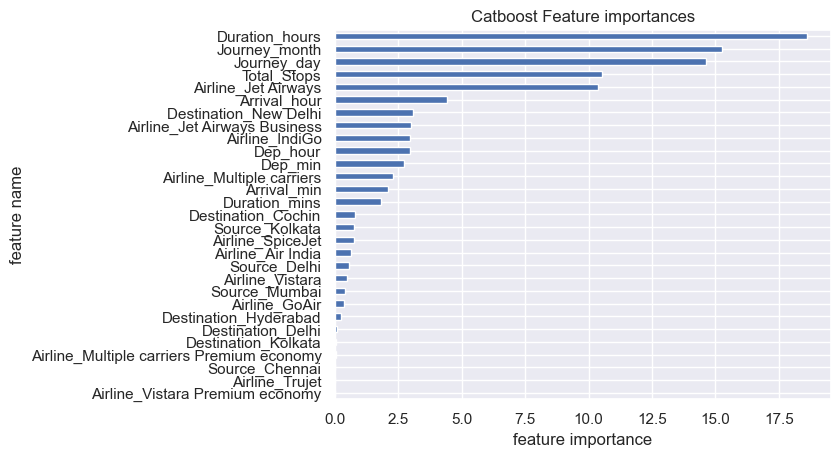

In [68]:
feature_imp = best_cbr.feature_importances_
feature_nm = best_cbr.feature_names_
imp_series = pd.Series(feature_imp)
imp_series.index = feature_nm
print(imp_series.sort_values(ascending=False))
print('\n')
imp_series.sort_values().plot(kind='barh',
                              xlabel='feature importance',
                              ylabel='feature name',
                              title='Catboost Feature importances')
plt.show()

### Tuning Random forest

In [69]:

# reg_rf = RandomForestRegressor()
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10, 15, 100]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 5, 10]

In [70]:
# # Create the random grid

# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf}

In [71]:
# # Random search of parameters, using 5 fold cross validation, 
# # search across 100 different combinations
# # Random search of parameters, using 5 fold cross validation, 
# # search across 100 different combinations
# rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [72]:
# rf_random.fit(X_train,y_train)

In [73]:
# rf_random.best_params_

In [74]:
# best_rf = rf_random.best_params_

# # Evaluate Train and Test dataset
# print_evaluated_results(best_rf,X_train,y_train,X_test,y_test)

###  Save the model to reuse it again

In [77]:
import pickle
file=open('flight_price_cbr.pkl','wb')
# dump information to that file
pickle.dump(rscv, file)


In [78]:
model = open('flight_price_cbr.pkl','rb')
regressor = pickle.load(model)

In [79]:
y_prediction = regressor.predict(X_test)

In [80]:
from sklearn import metrics

In [81]:
metrics.r2_score(y_test, y_prediction)

0.8614394190397868